# DirtyData
In this little project we are going to import a dirty csv-datafile into a panda dataframe and clean it. 

## 1. Import Library and File

In [207]:
# Import Libraries

try:
    import pandas as pd
    import seaborn as sns
    from scipy import stats
    import numpy as np
except IOError:
    print("Libraries not found!")

In [208]:
# Import CSV File

try:
    df = pd.read_csv("./data/dirtydata.csv")
except IOError:
    print("File not found!")

df.head(32)

,Dauer,Datum,Kunden,MinKauf,MaxKauf
0,60.0,'2020/12/01',110.0,130.0,409.1
1,60.0,'2020/12/02',117.0,145.0,4790.0
2,60.0,'2020/12/03',1030.0,135.0,340.0
3,45.0,'2020/12/04',109.0,175.0,282.4
4,45.0,'2020/12/05',117.0,NaN,406.0
5,60.0,'2020/12/06',102.0,127.0,300.0
6,60.0,'2020/12/07',NaN,1360.0,374.0
7,450.0,'2020/12/08',104.0,134.0,253.3
8,30.0,'2020/12/09',109.0,133.0,195.1
9,60.0,'2020/12/10',98.0,124.0,269.0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dauer    30 non-null     float64
 1   Datum    31 non-null     object 
 2   Kunden   31 non-null     float64
 3   MinKauf  31 non-null     float64
 4   MaxKauf  30 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


## 2. Clean Datafile
In this section we are going to clean the data. The following operations will be executed
- identify empty cells
- fill empty numeric cells with mean
- use dateformat for date column
- eliminate duplicates
- edit incorrect values: outliers,..

### 2.1 Change Date Format

In [212]:
# View date column data

df['Datum']

0     '2020/12/01'
1     '2020/12/02'
2     '2020/12/03'
3     '2020/12/04'
4     '2020/12/05'
5     '2020/12/06'
6     '2020/12/07'
7     '2020/12/08'
8     '2020/12/09'
9     '2020/12/10'
10    '2020/12/11'
11    '2020/12/12'
12    '2020/12/12'
13    '2020/12/13'
14    '2020/12/14'
15    '2020/12/15'
16    '2020/12/16'
17    '2020/12/17'
18    '2020/12/18'
19    '2020/12/19'
20    '2020/12/20'
21    '2020/12/21'
22             NaN
23    '2020/12/23'
24    '2020/12/24'
25    '2020/12/25'
26        20201226
27    '2020/12/27'
28    '2020/12/28'
29    '2020/12/29'
30    '2020/12/30'
31    '2020/12/31'
Name: Datum, dtype: object

In [213]:
# Check if line 22 is duplicate to 21 or 23

df.loc[[21,22,23]]

,Dauer,Datum,Kunden,MinKauf,MaxKauf
21,60.0,'2020/12/21',108.0,131.0,364.2
22,45.0,NaN,100.0,119.0,282.0
23,60.0,'2020/12/23',130.0,101.0,300.0


In [214]:
# Fill empty values and correct format

df.loc[26,'Datum'] = "'2020/01/26'"
df.loc[22,'Datum'] = "'2020/01/22'"

In [215]:
pd.to_datetime(df['Datum'], format="'%Y/%m/%d'")

0    2020-12-01
1    2020-12-02
2    2020-12-03
3    2020-12-04
4    2020-12-05
5    2020-12-06
6    2020-12-07
7    2020-12-08
8    2020-12-09
9    2020-12-10
10   2020-12-11
11   2020-12-12
12   2020-12-12
13   2020-12-13
14   2020-12-14
15   2020-12-15
16   2020-12-16
17   2020-12-17
18   2020-12-18
19   2020-12-19
20   2020-12-20
21   2020-12-21
22   2020-01-22
23   2020-12-23
24   2020-12-24
25   2020-12-25
26   2020-01-26
27   2020-12-27
28   2020-12-28
29   2020-12-29
30   2020-12-30
31   2020-12-31
Name: Datum, dtype: datetime64[ns]

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Dauer    30 non-null     float64
 1   Datum    32 non-null     object 
 2   Kunden   31 non-null     float64
 3   MinKauf  31 non-null     float64
 4   MaxKauf  30 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.4+ KB


### 2.2. Correct Outliers

In [218]:
# Basic statistical data for numeric columns

df.describe()

,Dauer,Kunden,MinKauf,MaxKauf
count,30.000000,31.000000,31.000000,30.00000
mean,69.500000,161.645161,167.354839,545.28000
std,72.258516,225.364675,221.704991,965.51857
min,30.000000,90.000000,101.000000,195.10000
25%,60.000000,100.000000,120.000000,250.70000
50%,60.000000,103.000000,127.000000,291.20000
75%,60.000000,108.500000,132.000000,359.47500
max,450.000000,1030.000000,1360.000000,4790.00000


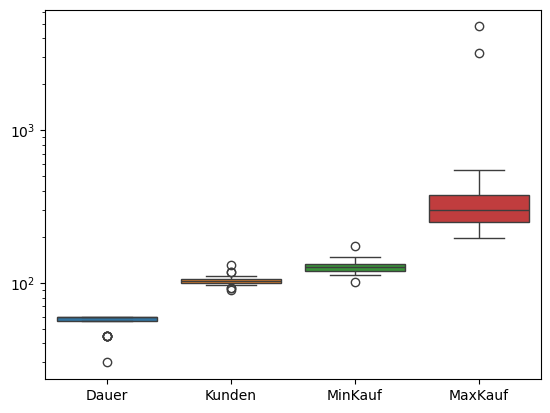

In [248]:
#Visualize outliers 

bp = sns.boxplot(data=df)
bp.set_yscale("log")

In [220]:
# Use Zscore to show outliers

z_score_treshold = 2

df[df.select_dtypes(include=[np.number]).apply(stats.zscore, nan_policy='omit') >=z_score_treshold]

,Dauer,Datum,Kunden,MinKauf,MaxKauf
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,4790.0
2,NaN,NaN,1030.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,1360.0,NaN
7,450.0,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN


### Comment Outliers

Handling outliers is a very subjective job. For validating the correctness of data it is necessary to have as much as knowledge about the origin of the data, the underlying processes, products,..

In this case, I will correct the outliers as followed
- Dauer: The value 450 is meant to be 45, as it is one of 3 discrete values of this column
- Kunden: This row is about customers, it could be possible that on selected dates the number of customers is much higher than 5x the standard deviation, but still it is highly unlikely. Due to that I will corret the values by dividing with 10, as these are more likely values
- If the minKauf value is higher than the maxKauf value it has to be a data error. For this reason I will divide it also by 10.
- For the maxKauf value it is possible, that on a few dates a very high priced product is sold, due to that I will not correct this outlier.

In [222]:
# Manual data correction of outliers

df.loc[7,'Dauer'] = 45
df.loc[2,'Kunden'] = 103
df.loc[16,'Kunden'] = 98
df.loc[6,'MinKauf'] = 136

### 2.3. Fill empty numeric values with mean

In [224]:
#Find cells with empty values

df.loc[df.isnull().any(axis=1)]

,Dauer,Datum,Kunden,MinKauf,MaxKauf
4,45.0,'2020/12/05',117.0,NaN,406.0
6,60.0,'2020/12/07',NaN,136.0,374.0
11,NaN,'2020/12/12',100.0,120.0,250.7
18,NaN,'2020/12/18',90.0,112.0,NaN
28,60.0,'2020/12/28',103.0,132.0,NaN


In [250]:
# Fill all NaN values with mean

for c in df.columns.drop('Datum'):
    mean = df[c].mean()
    df[c] = df[c].fillna(value=mean)

df

,Dauer,Datum,Kunden,MinKauf,MaxKauf
0,60.0,'2020/12/01',110.000000,130.000000,409.10
1,60.0,'2020/12/02',117.000000,145.000000,4790.00
2,60.0,'2020/12/03',103.000000,135.000000,340.00
3,45.0,'2020/12/04',109.000000,175.000000,282.40
4,45.0,'2020/12/05',117.000000,127.870968,406.00
5,60.0,'2020/12/06',102.000000,127.000000,300.00
6,60.0,'2020/12/07',103.290323,136.000000,374.00
7,45.0,'2020/12/08',104.000000,134.000000,253.30
8,30.0,'2020/12/09',109.000000,133.000000,195.10
9,60.0,'2020/12/10',98.000000,124.000000,269.00


### 2.4. Delete Duplicate Rows

In [253]:
# Find duplicates

df[df.duplicated(keep='first')]

,Dauer,Datum,Kunden,MinKauf,MaxKauf


In [259]:
# No duplicate rows found, but Datum is like an ID and should be unique

df[df.duplicated(['Datum'], keep=False)]

,Dauer,Datum,Kunden,MinKauf,MaxKauf
11,56.0,'2020/12/12',100.0,120.0,250.7
12,60.0,'2020/12/12',100.0,120.0,250.7


In [277]:
df.drop_duplicates(['Datum'], keep='first', inplace=True)
df = df.reset_index(axis='index')
df.head(32)

TypeError: DataFrame.reset_index() got an unexpected keyword argument 'axis'

## Summary & Outlook
Nearly 90% of the time of a data scientist is used for data cleaning. The process of data cleaning is non-standardized and dependend on the datafile and the purpose of use in later transformation. 

Also the order of the execution of typical data cleaning operations as na_filling, outliers, duplicates has an effect of the outcome in later transformations like ML,...
